# Identify Relationships Between Variables with Visualizations

In [1]:
import pandas as pd

In [2]:
# Import cleaned data

c_data = pd.read_csv('C:\\cleaned_data.csv')
c_data.head()

,user_id,session_id,date,country,gender,category,has_account,has_price_alert,platform,average_leadout_price,leadouts
0,1591926,5169471070,2022-09-01,AT,m,Electronics,0.0,0.0,web,257.79,7.0
1,1892859,5350443957,2022-09-01,AT,f,Electronics,0.0,0.0,web,109.56,8.0
2,1818994,6003531696,2022-09-01,FR,f,Electronics,0.0,0.0,web,412.62,6.0
3,1832000,5354845851,2022-09-01,DE,f,Car Parts and Accessories,0.0,0.0,mobile web,176.83,3.0
4,1524768,7660272800,2022-09-01,FR,m,Fashion,0.0,0.0,app,43.00,10.0


In [3]:
# First convert all data type to numeric represent, in order to correlation analysis
# Than check correlation coefficiencies

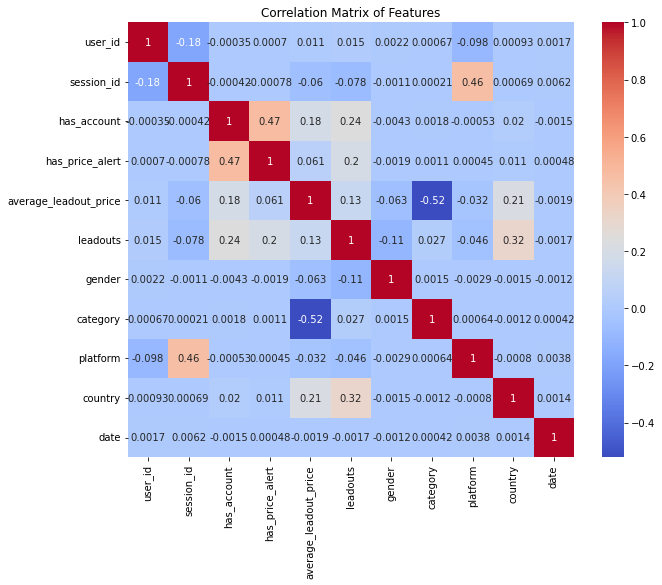

In [46]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Assuming your DataFrame is named 'c_data'

# Select the relevant features for correlation analysis
selected_features = c_data[['country', 'user_id', 'session_id', 'date', 'gender', 'category', 'has_account', 'has_price_alert', 'platform', 'average_leadout_price', 'leadouts']]

# Convert object-type features to numeric representation
numeric_data = selected_features.select_dtypes(include=['float64', 'int64']).copy()
numeric_data['gender'] = pd.factorize(selected_features['gender'])[0]
numeric_data['category'] = pd.factorize(selected_features['category'])[0]
numeric_data['platform'] = pd.factorize(selected_features['platform'])[0]
numeric_data['country'] = pd.factorize(selected_features['country'])[0]
numeric_data['date'] = pd.factorize(selected_features['date'])[0]

# Calculate the correlation matrix
correlation_matrix = numeric_data.corr()

# Plot the correlation matrix
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')

# Set title
plt.title('Correlation Matrix of Features')

# Show the plot
plt.show()

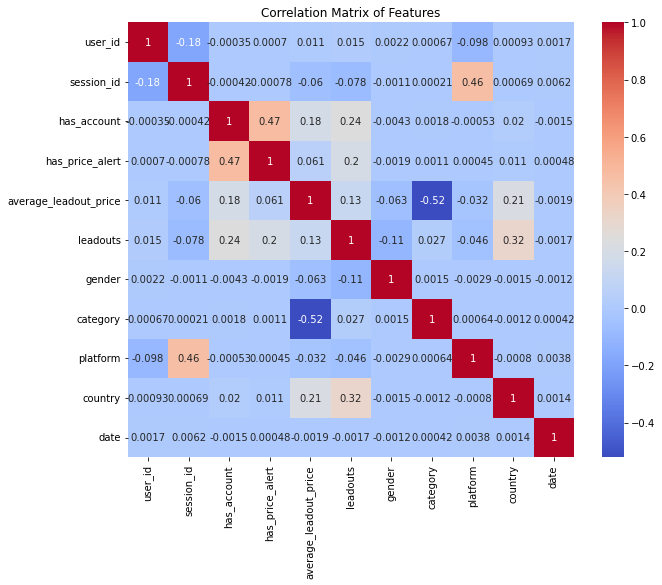

P-values:
                        user_id session_id has_account has_price_alert  \
user_id                     0.0        0.0    0.784616        0.589618   
session_id                  0.0        0.0    0.741816        0.546154   
has_account            0.784616   0.741816         0.0             0.0   
has_price_alert        0.589618   0.546154         0.0             0.0   
average_leadout_price       0.0        0.0         0.0             0.0   
leadouts                    0.0        0.0         0.0             0.0   
gender                 0.092551   0.380838    0.000846        0.136855   
category               0.605403   0.871977    0.157372        0.383122   
platform                    0.0        0.0    0.683344        0.727737   
country                0.471618   0.592103         0.0             0.0   
date                   0.185363   0.000002    0.229501        0.707569   

                      average_leadout_price  leadouts    gender  category  \
user_id                 

In [193]:
#Correlation Coefficiency as P-Value
#Based on the provided p-value results, the variables that have statistically significant correlations 
#(p-value < 0.05) are as follows:
#'has_account' and 'gender' have a statistically significant correlation with a p-value of 0.000846.
#'platform' and 'date' have a statistically significant correlation with a p-value of 0.003159.


import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from scipy.stats import pearsonr

# Assuming your DataFrame is named 'c_data'

# Select the relevant features for correlation analysis
selected_features = c_data[['country', 'user_id', 'session_id', 'date', 'gender', 'category', 'has_account', 'has_price_alert', 'platform', 'average_leadout_price', 'leadouts']]

# Convert object-type features to numeric representation
numeric_data = selected_features.select_dtypes(include=['float64', 'int64']).copy()
numeric_data['gender'] = pd.factorize(selected_features['gender'])[0]
numeric_data['category'] = pd.factorize(selected_features['category'])[0]
numeric_data['platform'] = pd.factorize(selected_features['platform'])[0]
numeric_data['country'] = pd.factorize(selected_features['country'])[0]
numeric_data['date'] = pd.factorize(selected_features['date'])[0]

# Calculate the correlation matrix
correlation_matrix = numeric_data.corr()

# Calculate p-values for correlation coefficients
p_values = pd.DataFrame(index=correlation_matrix.index, columns=correlation_matrix.columns)

for feature1 in correlation_matrix.columns:
    for feature2 in correlation_matrix.columns:
        corr_coef, p_value = pearsonr(numeric_data[feature1], numeric_data[feature2])
        p_values.loc[feature1, feature2] = p_value

# Plot the correlation matrix
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')

# Set title
plt.title('Correlation Matrix of Features')

# Show the plot
plt.show()

# Display the p-values
print("P-values:")
print(p_values)

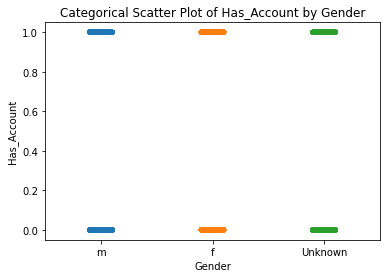

In [49]:
# 'has_account' and 'gender' have a statistically significant correlation with a p-value of 0.000846.

# Create the categorical scatter plot
sns.stripplot(x='gender', y='has_account', data=c_data, jitter=True)

# Set labels and title
plt.xlabel('Gender')
plt.ylabel('Has_Account')
plt.title('Categorical Scatter Plot of Has_Account by Gender')

# Show the plot
plt.show()

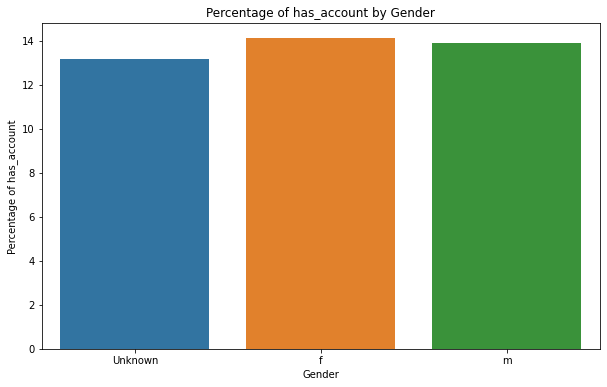

In [50]:
# Calculate the percentage of 'has_account' by 'gender'

import seaborn as sns
import matplotlib.pyplot as plt


percentage_data = c_data.groupby('gender')['has_account'].value_counts(normalize=True).mul(100).rename('Percentage').reset_index()

# Filter for 'has_account' values equal to 1 (True)
percentage_data = percentage_data[percentage_data['has_account'] == 1]

# Bar plot for percentage of 'has_account' by 'gender'
plt.figure(figsize=(10, 6))
sns.barplot(data=percentage_data, x='gender', y='Percentage')
plt.xlabel('Gender')
plt.ylabel('Percentage of has_account')
plt.title('Percentage of has_account by Gender')
plt.show()

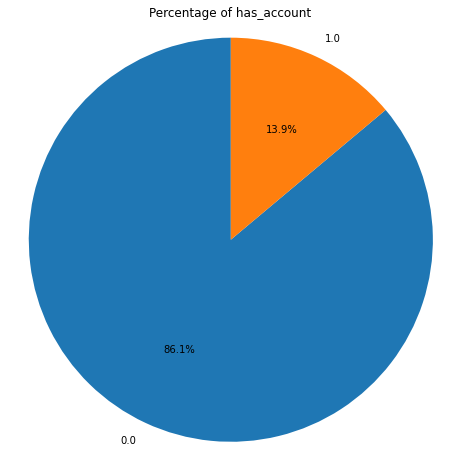

In [52]:
# Calculate the percentage of 'has_account' across all user_id values

import matplotlib.pyplot as plt


percentage_data = c_data['has_account'].value_counts(normalize=True) * 100

# Create a pie chart
plt.figure(figsize=(8, 8))
plt.pie(percentage_data, labels=percentage_data.index, autopct='%1.1f%%', startangle=90)

# Set aspect ratio to be equal to ensure a circular pie chart
plt.axis('equal')

# Set title
plt.title('Percentage of has_account')

# Display the chart
plt.show()

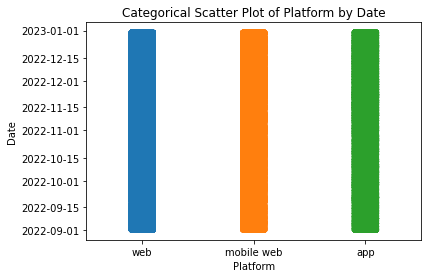

In [53]:
#'platform' and 'date' have a statistically significant correlation with a p-value of 0.003159.

# Create the categorical scatter plot
sns.stripplot(x='platform', y='date', data=c_data, jitter=True)

# Set labels and title
plt.xlabel('Platform')
plt.ylabel('Date')
plt.title('Categorical Scatter Plot of Platform by Date')

# Show the plot
plt.show()



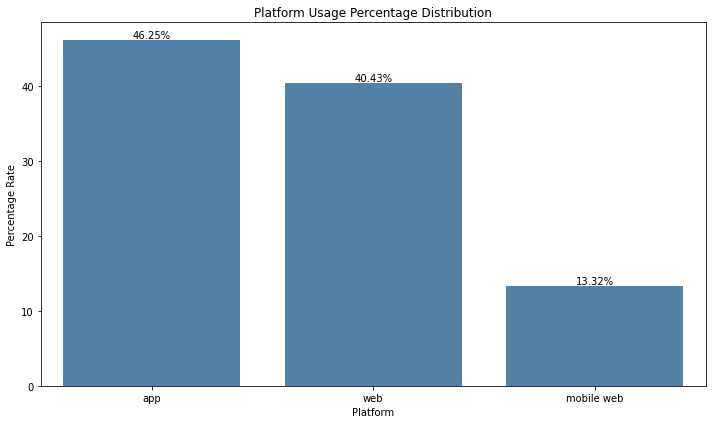

In [90]:
import matplotlib.pyplot as plt
import seaborn as sns

# Calculate the percentage of each platform
platform_percentage = c_data['platform'].value_counts(normalize=True).reset_index()
platform_percentage.columns = ['platform', 'percentage']
platform_percentage['percentage_rate'] = platform_percentage['percentage'] * 100

# Sort the data by percentage in descending order
platform_percentage = platform_percentage.sort_values('percentage', ascending=False)

# Set the threshold percentage rate
threshold_percentage = 5  # Adjust this value as per your preference

# Filter the data based on the threshold percentage rate
filtered_data = platform_percentage[platform_percentage['percentage_rate'] >= threshold_percentage]

# Create the bar plot
plt.figure(figsize=(10, 6))
sns.barplot(data=filtered_data, x='platform', y='percentage_rate', color='steelblue')
plt.xlabel('Platform')
plt.ylabel('Percentage Rate')
plt.title('Platform Usage Percentage Distribution')

# Annotate the percentage rate on top of each bar
for i, percentage in enumerate(filtered_data['percentage_rate']):
    plt.annotate(f'{percentage:.2f}%', (i, percentage), ha='center', va='bottom')

# Show the plot
plt.tight_layout()
plt.show()


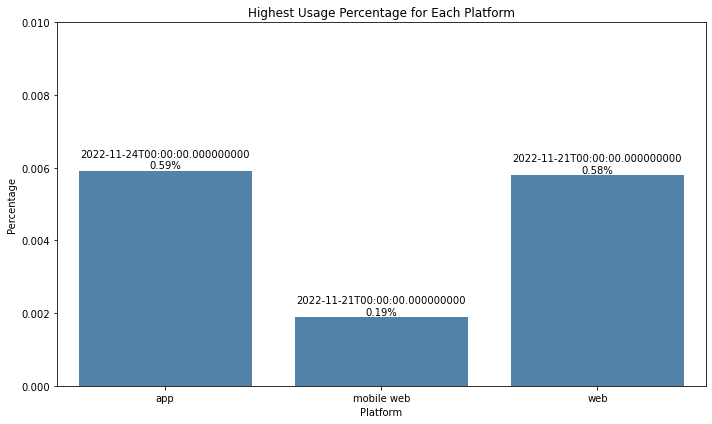

In [211]:
import matplotlib.pyplot as plt
import seaborn as sns

# Calculate the percentage of each platform on each date
platform_percentage = c_data.groupby(['date', 'platform']).size().div(len(c_data)).reset_index(name='percentage')

# Find the day with the highest percentage for each platform
platform_highest_day = platform_percentage.groupby('platform')['percentage'].idxmax()
platform_highest_day_data = platform_percentage.loc[platform_highest_day]

# Create the bar plot
plt.figure(figsize=(10, 6))
sns.barplot(data=platform_highest_day_data, x='platform', y='percentage', color='steelblue')
plt.xlabel('Platform')
plt.ylabel('Percentage')
plt.title('Highest Usage Percentage for Each Platform')
plt.ylim(0.0, 0.01)  # Set the y-axis limit to better visualize the percentages

# Annotate the day with the highest percentage for each platform
for i, platform in enumerate(platform_highest_day_data['platform']):
    day = platform_highest_day_data.loc[platform_highest_day_data['platform'] == platform, 'date'].values[0]
    percentage = platform_highest_day_data.loc[platform_highest_day_data['platform'] == platform, 'percentage'].values[0]
    plt.annotate(f'{day}\n{percentage:.2%}', (i, percentage), ha='center', va='bottom')

# Show the plot
plt.tight_layout()
plt.show()


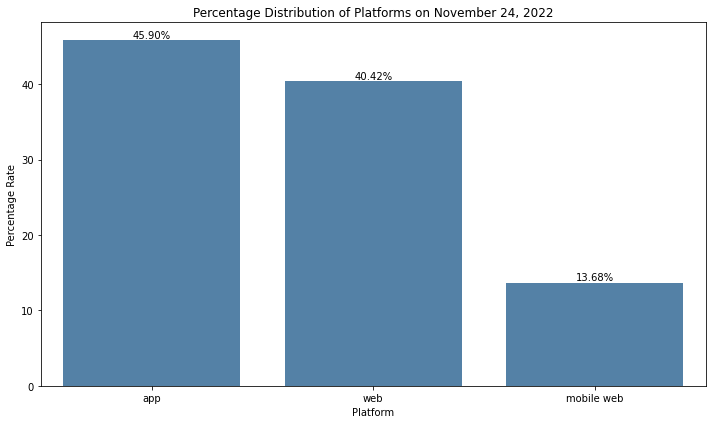

In [88]:
import matplotlib.pyplot as plt
import seaborn as sns

# Filter the data for November 24, 2022
date_filter = c_data['date'] == '2022-11-24'
platform_percentage = c_data[date_filter].groupby('platform').size().div(len(c_data[date_filter])).reset_index(name='percentage')
platform_percentage['percentage_rate'] = platform_percentage['percentage'] * 100

# Sort the data by percentage in descending order
platform_percentage = platform_percentage.sort_values('percentage', ascending=False)

# Create the bar plot
plt.figure(figsize=(10, 6))
sns.barplot(data=platform_percentage, x='platform', y='percentage_rate', color='steelblue')
plt.xlabel('Platform')
plt.ylabel('Percentage Rate')
plt.title('Percentage Distribution of Platforms on November 24, 2022')

# Annotate the percentage rate on top of each bar
for i, percentage in enumerate(platform_percentage['percentage_rate']):
    plt.annotate(f'{percentage:.2f}%', (i, percentage), ha='center', va='bottom')

# Show the plot
plt.tight_layout()
plt.show()


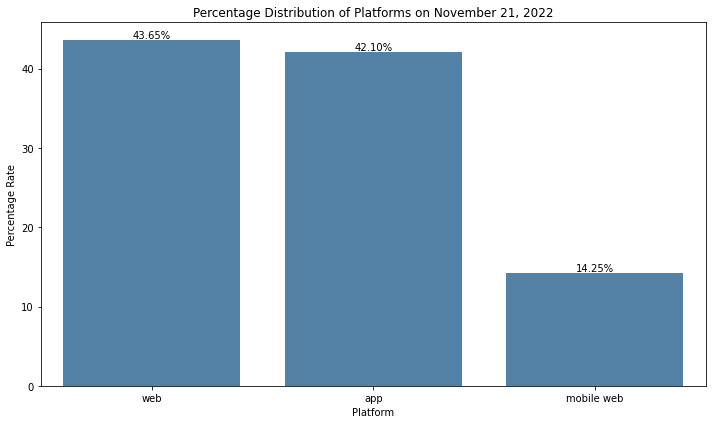

In [89]:
import matplotlib.pyplot as plt
import seaborn as sns

# Filter the data for November 21, 2022
date_filter = c_data['date'] == '2022-11-21'
platform_percentage = c_data[date_filter].groupby('platform').size().div(len(c_data[date_filter])).reset_index(name='percentage')
platform_percentage['percentage_rate'] = platform_percentage['percentage'] * 100

# Sort the data by percentage in descending order
platform_percentage = platform_percentage.sort_values('percentage', ascending=False)

# Create the bar plot
plt.figure(figsize=(10, 6))
sns.barplot(data=platform_percentage, x='platform', y='percentage_rate', color='steelblue')
plt.xlabel('Platform')
plt.ylabel('Percentage Rate')
plt.title('Percentage Distribution of Platforms on November 21, 2022')

# Annotate the percentage rate on top of each bar
for i, percentage in enumerate(platform_percentage['percentage_rate']):
    plt.annotate(f'{percentage:.2f}%', (i, percentage), ha='center', va='bottom')

# Show the plot
plt.tight_layout()
plt.show()


In [97]:
# Calculate the daily platform usage percentages
daily_percentage = c_data.groupby('date')['platform'].value_counts(normalize=True).mul(100).rename('percentage').reset_index()

# Filter the data for web and app platforms
web_data = daily_percentage[daily_percentage['platform'] == 'web']
app_data = daily_percentage[daily_percentage['platform'] == 'app']

# Reset the index for both DataFrames
web_data = web_data.reset_index(drop=True)
app_data = app_data.reset_index(drop=True)

# Find the days when web platform usage is greater than app platform usage
web_higher_days = web_data[web_data['percentage'] > app_data['percentage']]

# Get the list of days when web platform usage is greater than app platform usage
web_higher_days_list = web_higher_days['date'].tolist()

# Print the list of days
print("Days when web platform usage is greater than app platform usage:")
print(web_higher_days_list)



Days when web platform usage is greater than app platform usage:
[Timestamp('2022-09-06 00:00:00'), Timestamp('2022-09-20 00:00:00'), Timestamp('2022-09-27 00:00:00'), Timestamp('2022-10-04 00:00:00'), Timestamp('2022-10-11 00:00:00'), Timestamp('2022-10-18 00:00:00'), Timestamp('2022-10-25 00:00:00'), Timestamp('2022-11-08 00:00:00'), Timestamp('2022-11-15 00:00:00'), Timestamp('2022-11-16 00:00:00'), Timestamp('2022-11-21 00:00:00'), Timestamp('2022-11-22 00:00:00'), Timestamp('2022-12-12 00:00:00'), Timestamp('2022-12-13 00:00:00'), Timestamp('2022-12-20 00:00:00')]


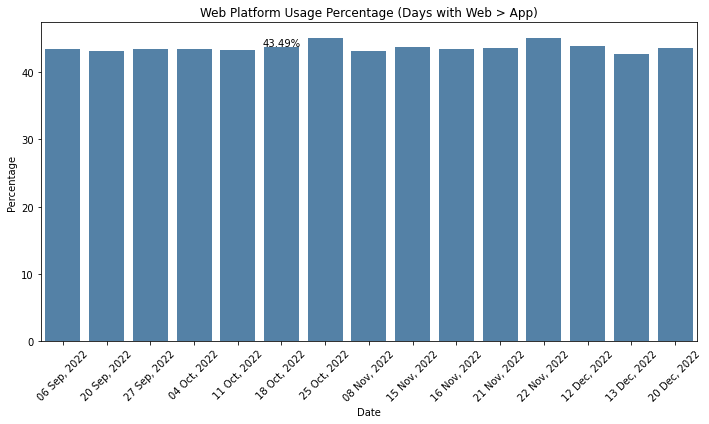

In [103]:
import matplotlib.pyplot as plt
import seaborn as sns

# List of days when web platform usage is greater than app platform usage
web_higher_days_list = [
    '2022-09-06', '2022-09-20', '2022-09-27', '2022-10-04', '2022-10-11',
    '2022-10-18', '2022-10-25', '2022-11-08', '2022-11-15', '2022-11-16',
    '2022-11-21', '2022-11-22', '2022-12-12', '2022-12-13', '2022-12-20'
]

# Convert the date strings to datetime objects
web_higher_days_list = [pd.to_datetime(date).date() for date in web_higher_days_list]

# Filter the data for the specified dates
filtered_data = web_data[web_data['date'].isin(web_higher_days_list)]

# Plot the result
plt.figure(figsize=(10, 6))
sns.barplot(data=filtered_data, x='date', y='percentage', color='steelblue')
plt.xlabel('Date')
plt.ylabel('Percentage')
plt.title('Web Platform Usage Percentage (Days with Web > App)')

# Format x-axis tick labels as 'day month, year'
plt.xticks(ticks=range(len(filtered_data)), labels=[date.strftime('%d %b, %Y') for date in filtered_data['date']])
plt.xticks(rotation=45)
plt.tight_layout()

# Annotate the dates on top of the bars
for i, row in filtered_data.iterrows():
    percentage = row['percentage']
    plt.annotate(f'{percentage:.2f}%', (i, percentage), ha='center', va='bottom')

plt.show()


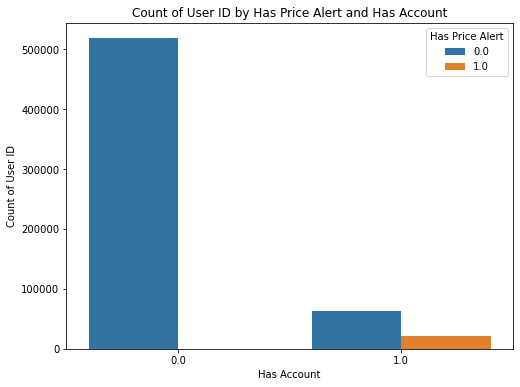

In [5]:
# has_price_alert/has_account correlation 0.47

import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Group the data by has_price_alert and has_account and calculate the count of user_id
count_data = c_data.groupby(['has_price_alert', 'has_account'])['user_id'].count().reset_index()

# Create the count plot
plt.figure(figsize=(8, 6))
sns.barplot(x='has_account', y='user_id', hue='has_price_alert', data=count_data)
plt.xlabel('Has Account')
plt.ylabel('Count of User ID')
plt.title('Count of User ID by Has Price Alert and Has Account')
plt.legend(title='Has Price Alert')
plt.show()

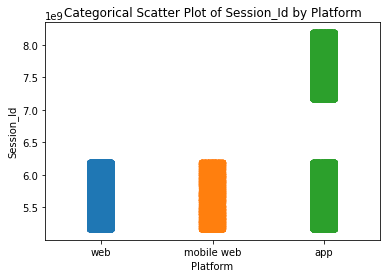

In [6]:
# platform/session_id correlation 0.46

# Create the categorical scatter plot
sns.stripplot(x='platform', y='session_id', data=c_data, jitter=True)

# Set labels and title
plt.xlabel('Platform')
plt.ylabel('Session_Id')
plt.title('Categorical Scatter Plot of Session_Id by Platform')

# Show the plot
plt.show()

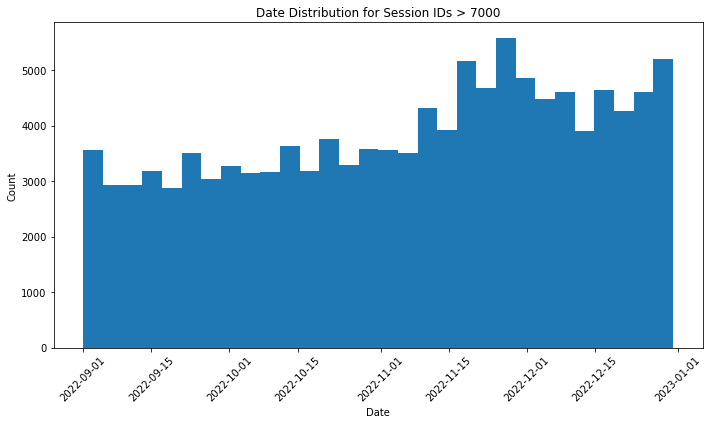

In [195]:
#session_id bigger than 7000000000 on date

import matplotlib.pyplot as plt

# Filter the data for session_id larger than 7000000000
filtered_data = c_data[c_data['session_id'] > 7000000000]

# Plot the date distribution
plt.figure(figsize=(10, 6))  # Set the figure size
plt.hist(filtered_data['date'], bins=30)  # Plot the histogram
plt.xlabel('Date')  # Set the x-axis label
plt.ylabel('Count')  # Set the y-axis label
plt.title('Date Distribution for Session IDs > 7000')  # Set the title
plt.xticks(rotation=45)  # Rotate x-axis labels for better readability
plt.tight_layout()  # Adjust the spacing between subplots
plt.show()

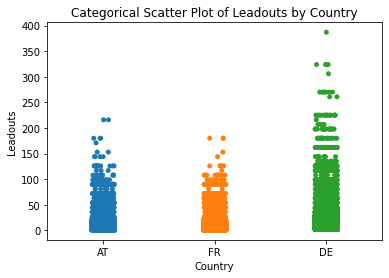

In [7]:
#leadouts/country correlation 0.32

# Create the categorical scatter plot
sns.stripplot(x='country', y='leadouts', data=c_data, jitter=True)

# Set labels and title
plt.xlabel('Country')
plt.ylabel('Leadouts')
plt.title('Categorical Scatter Plot of Leadouts by Country')

# Show the plot
plt.show()

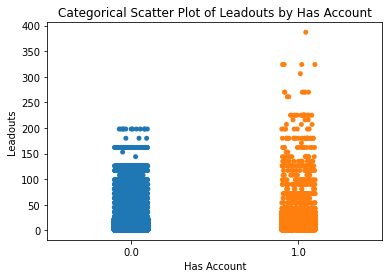

In [8]:
#has_account/leadouts correlation 0.24

# Create the categorical scatter plot
sns.stripplot(x='has_account', y='leadouts', data=c_data, jitter=True)

# Set labels and title
plt.xlabel('Has Account')
plt.ylabel('Leadouts')
plt.title('Categorical Scatter Plot of Leadouts by Has Account')

# Show the plot
plt.show()

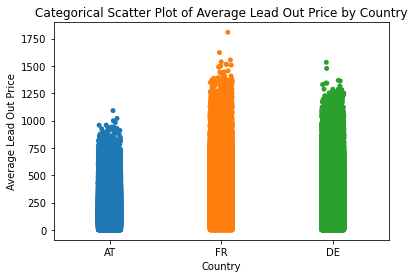

In [9]:
#country/average_leadout_price correlation 0.21

# Create the categorical scatter plot
sns.stripplot(x='country', y='average_leadout_price', data=c_data, jitter=True)

# Set labels and title
plt.xlabel('Country')
plt.ylabel('Average Lead Out Price')
plt.title('Categorical Scatter Plot of Average Lead Out Price by Country')

# Show the plot
plt.show()

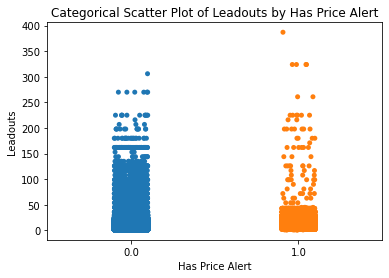

In [10]:
#has_price_alert/leadouts correlation 0.2

# Create the categorical scatter plot
sns.stripplot(x='has_price_alert', y='leadouts', data=c_data, jitter=True)

# Set labels and title
plt.xlabel('Has Price Alert')
plt.ylabel('Leadouts')
plt.title('Categorical Scatter Plot of Leadouts by Has Price Alert')

# Show the plot
plt.show()

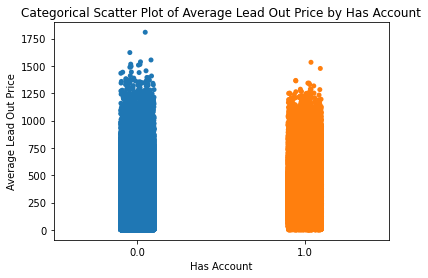

In [11]:
#has_account/average_leadout_price correlation 0.18

# Create the categorical scatter plot
sns.stripplot(x='has_account', y='average_leadout_price', data=c_data, jitter=True)

# Set labels and title
plt.xlabel('Has Account')
plt.ylabel('Average Lead Out Price')
plt.title('Categorical Scatter Plot of Average Lead Out Price by Has Account')

# Show the plot
plt.show()

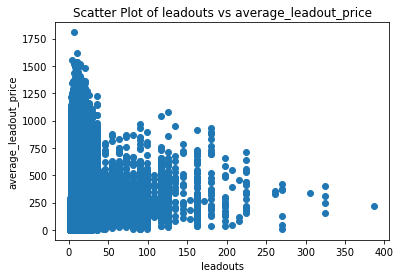

In [20]:
#leadouts/average_leadout_price correlation 0.13

# Create a scatter plot
plt.scatter(c_data['leadouts'], c_data['average_leadout_price'])

# Set labels and title
plt.xlabel('leadouts')
plt.ylabel('average_leadout_price')
plt.title('Scatter Plot of leadouts vs average_leadout_price')

# Show the plot
plt.show()

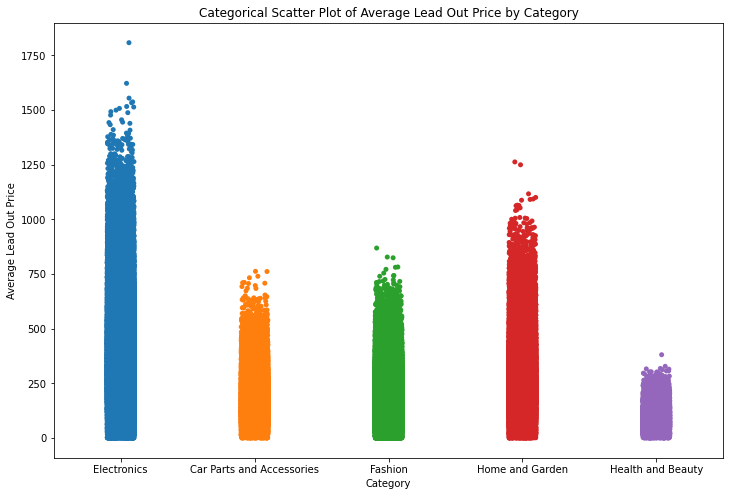

In [13]:
#category/average_leadout_price correlation -0.39

plt.figure(figsize=(12, 8))
# Create the categorical scatter plot
sns.stripplot(x='category', y='average_leadout_price', data=c_data, jitter=True)

# Set labels and title
plt.xlabel('Category')
plt.ylabel('Average Lead Out Price')
plt.title('Categorical Scatter Plot of Average Lead Out Price by Category')

# Show the plot
plt.show()

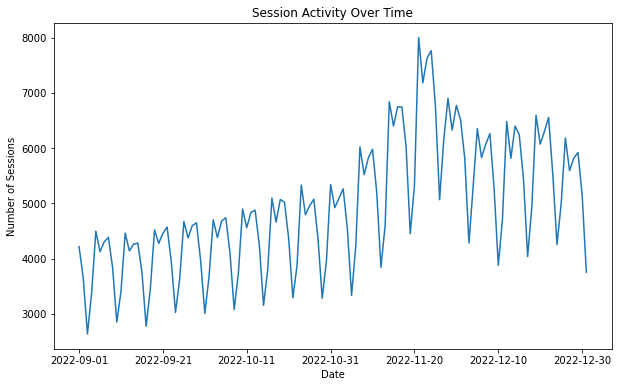

In [16]:
#session_id/ date

plt.figure(figsize=(10, 6))
c_data.groupby('date')['session_id'].count().plot()
plt.xlabel('Date')
plt.ylabel('Number of Sessions')
plt.title('Session Activity Over Time')
plt.show()

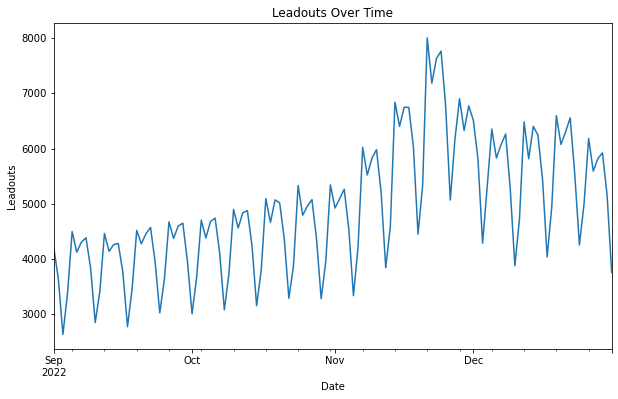

In [191]:
#leadouts/date

plt.figure(figsize=(10, 6))
c_data.groupby('date')['leadouts'].count().plot()
plt.xlabel('Date')
plt.ylabel('Leadouts')
plt.title('Leadouts Over Time')
plt.show()

In [45]:
c_data.head()

,user_id,session_id,date,country,gender,category,has_account,has_price_alert,platform,average_leadout_price,leadouts
0,1591926,5169471070,2022-09-01,AT,m,Electronics,0.0,0.0,web,257.79,7.0
1,1591926,5355144810,2022-12-02,AT,m,Electronics,0.0,0.0,web,310.53,7.0
2,1591926,5393281730,2022-12-21,AT,m,Home and Garden,0.0,0.0,web,303.22,6.0
3,1892859,5350443957,2022-09-01,AT,f,Electronics,0.0,0.0,web,109.56,8.0
4,1892859,5388379445,2022-09-27,AT,f,Home and Garden,0.0,0.0,web,124.46,4.0


# Leadouts Across All Other Features


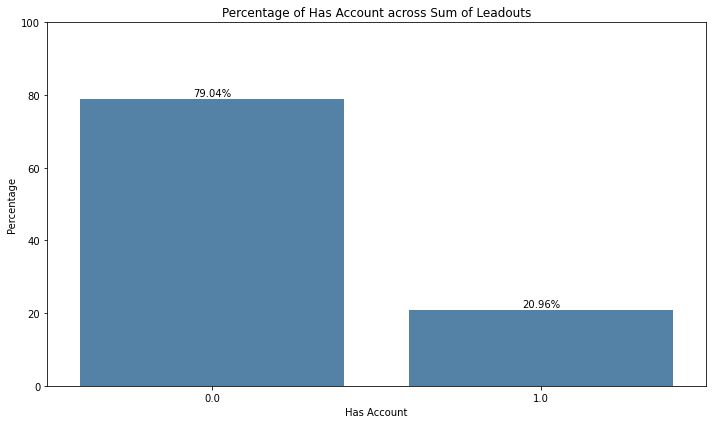

In [107]:
# Calculate the sum of leadouts and the percentage rate of has_account
import matplotlib.pyplot as plt
import seaborn as sns


percentage_data = c_data.groupby('has_account')['leadouts'].sum().div(c_data['leadouts'].sum()).mul(100).reset_index()
percentage_data.rename(columns={'leadouts': 'percentage'}, inplace=True)

# Plot the data
plt.figure(figsize=(10, 6))
sns.barplot(data=percentage_data, x='has_account', y='percentage', color='steelblue')
plt.xlabel('Has Account')
plt.ylabel('Percentage')
plt.title('Percentage of Has Account across Sum of Leadouts')

# Annotate the percentages on top of the bars
for i, row in percentage_data.iterrows():
    percentage = row['percentage']
    plt.annotate(f'{percentage:.2f}%', (i, percentage), ha='center', va='bottom')

plt.ylim(0, 100)
plt.tight_layout()
plt.show()


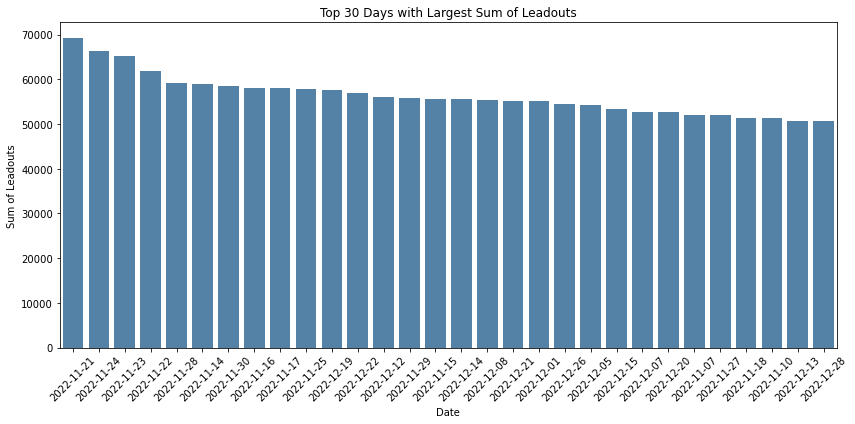

In [110]:
import matplotlib.pyplot as plt
import seaborn as sns

# Convert the date column to datetime data type
c_data['date'] = pd.to_datetime(c_data['date'])

# Calculate the sum of leadouts for each day
leadouts_sum = c_data.groupby(c_data['date'].dt.date)['leadouts'].sum().reset_index()

# Sort the data by leadouts sum in descending order and select the top 30 days
top_30_days = leadouts_sum.nlargest(30, 'leadouts')

# Plot the top 30 days
plt.figure(figsize=(12, 6))
sns.barplot(data=top_30_days, x='date', y='leadouts', color='steelblue')
plt.xlabel('Date')
plt.ylabel('Sum of Leadouts')
plt.title('Top 30 Days with Largest Sum of Leadouts')

# Rotate the x-axis labels for better readability
plt.xticks(rotation=45)

# Annotate the leadouts values on top of the bars
for i, row in top_30_days.iterrows():
    leadouts = row['leadouts']
    plt.annotate(str(leadouts), (i, leadouts), ha='center', va='bottom')

plt.tight_layout()
plt.show()



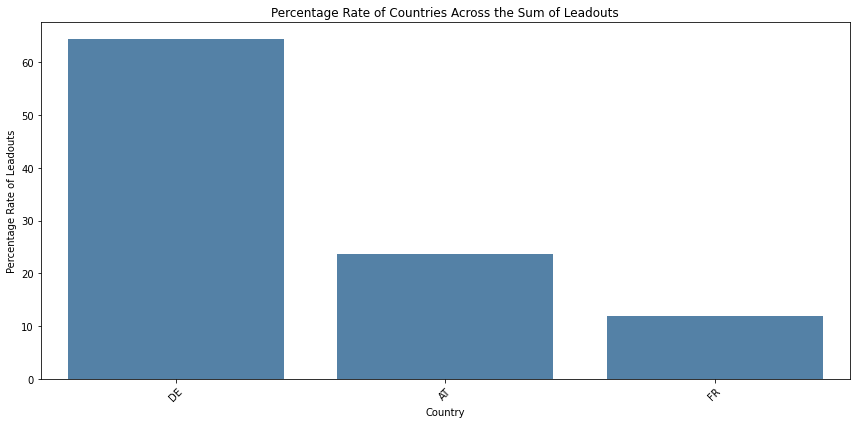

In [118]:
# Calculate the sum of leadouts for each country
import matplotlib.pyplot as plt
import seaborn as sns

# Calculate the sum of leadouts for each country
leadouts_sum_country = c_data.groupby('country')['leadouts'].sum()

# Calculate the total sum of leadouts
total_leadouts_sum = leadouts_sum_country.sum()

# Calculate the percentage rate of each country's leadouts
percentage_rate_country = (leadouts_sum_country / total_leadouts_sum) * 100

# Sort the data by percentage rate in descending order
sorted_data = percentage_rate_country.sort_values(ascending=False)

# Plot the percentage rates of countries across the sum of leadouts
plt.figure(figsize=(12, 6))
sns.barplot(x=sorted_data.index, y=sorted_data.values, color='steelblue')
plt.xlabel('Country')
plt.ylabel('Percentage Rate of Leadouts')
plt.title('Percentage Rate of Countries Across the Sum of Leadouts')

# Rotate the x-axis labels for better readability
plt.xticks(rotation=45)

plt.tight_layout()
plt.show()




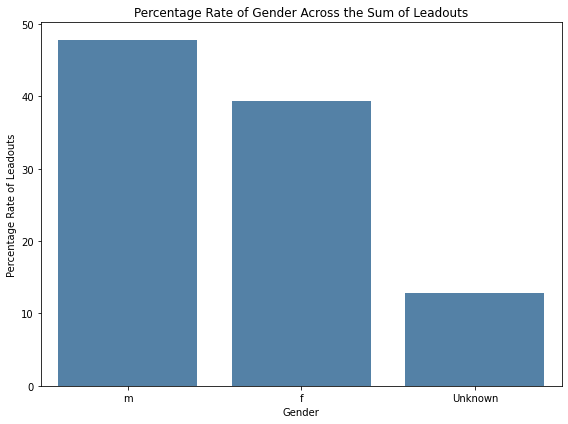

In [113]:
# Calculate the sum of leadouts for each gender

import matplotlib.pyplot as plt
import seaborn as sns


leadouts_sum_gender = c_data.groupby('gender')['leadouts'].sum()

# Calculate the total sum of leadouts
total_leadouts_sum = leadouts_sum_gender.sum()

# Calculate the percentage rate of each gender's leadouts
percentage_rate_gender = (leadouts_sum_gender / total_leadouts_sum) * 100

# Sort the data by percentage rate in descending order
sorted_data = percentage_rate_gender.sort_values(ascending=False)

# Plot the percentage rates of gender across the sum of leadouts
plt.figure(figsize=(8, 6))
sns.barplot(x=sorted_data.index, y=sorted_data.values, color='steelblue')
plt.xlabel('Gender')
plt.ylabel('Percentage Rate of Leadouts')
plt.title('Percentage Rate of Gender Across the Sum of Leadouts')

plt.tight_layout()
plt.show()


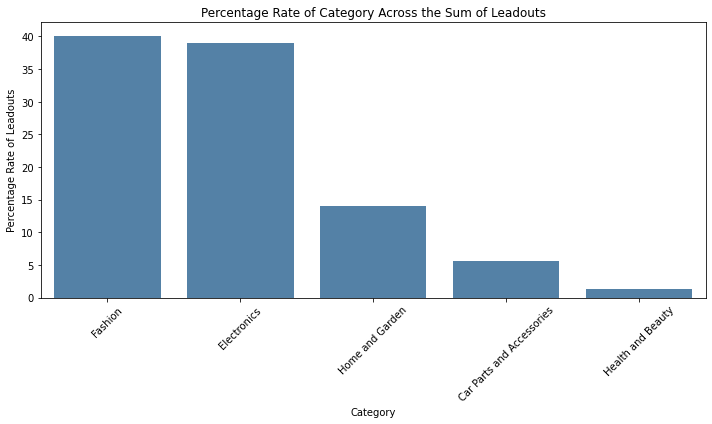

In [114]:
import matplotlib.pyplot as plt
import seaborn as sns

# Calculate the sum of leadouts for each category
leadouts_sum_category = c_data.groupby('category')['leadouts'].sum()

# Calculate the total sum of leadouts
total_leadouts_sum = leadouts_sum_category.sum()

# Calculate the percentage rate of each category's leadouts
percentage_rate_category = (leadouts_sum_category / total_leadouts_sum) * 100

# Sort the data by percentage rate in descending order
sorted_data = percentage_rate_category.sort_values(ascending=False)

# Plot the percentage rates of categories across the sum of leadouts
plt.figure(figsize=(10, 6))
sns.barplot(x=sorted_data.index, y=sorted_data.values, color='steelblue')
plt.xlabel('Category')
plt.ylabel('Percentage Rate of Leadouts')
plt.title('Percentage Rate of Category Across the Sum of Leadouts')

plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

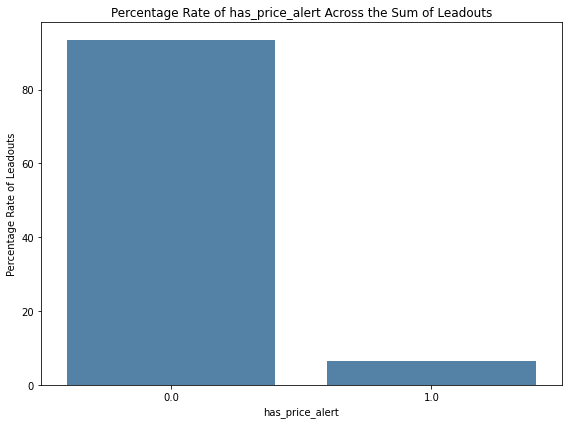

In [120]:
import matplotlib.pyplot as plt
import seaborn as sns

# Calculate the sum of leadouts for each value of has_price_alert
leadouts_sum_alert = c_data.groupby('has_price_alert')['leadouts'].sum()

# Calculate the total sum of leadouts
total_leadouts_sum = leadouts_sum_alert.sum()

# Calculate the percentage rate of each value of has_price_alert's leadouts
percentage_rate_alert = (leadouts_sum_alert / total_leadouts_sum) * 100

# Plot the percentage rates of has_price_alert across the sum of leadouts
plt.figure(figsize=(8, 6))
sns.barplot(x=percentage_rate_alert.index, y=percentage_rate_alert.values, color='steelblue')
plt.xlabel('has_price_alert')
plt.ylabel('Percentage Rate of Leadouts')
plt.title('Percentage Rate of has_price_alert Across the Sum of Leadouts')

plt.tight_layout()
plt.show()


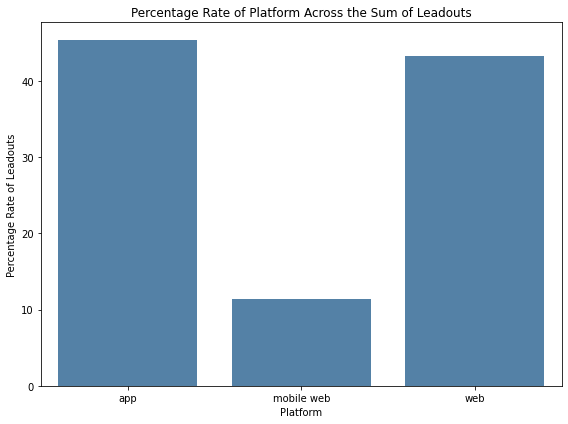

In [121]:
import matplotlib.pyplot as plt
import seaborn as sns

# Calculate the sum of leadouts for each platform
leadouts_sum_platform = c_data.groupby('platform')['leadouts'].sum()

# Calculate the total sum of leadouts
total_leadouts_sum = leadouts_sum_platform.sum()

# Calculate the percentage rate of each platform's leadouts
percentage_rate_platform = (leadouts_sum_platform / total_leadouts_sum) * 100

# Plot the percentage rates of platform across the sum of leadouts
plt.figure(figsize=(8, 6))
sns.barplot(x=percentage_rate_platform.index, y=percentage_rate_platform.values, color='steelblue')
plt.xlabel('Platform')
plt.ylabel('Percentage Rate of Leadouts')
plt.title('Percentage Rate of Platform Across the Sum of Leadouts')

plt.tight_layout()
plt.show()


# Price Optimization For Händler As Average Lead Out Price Clustering


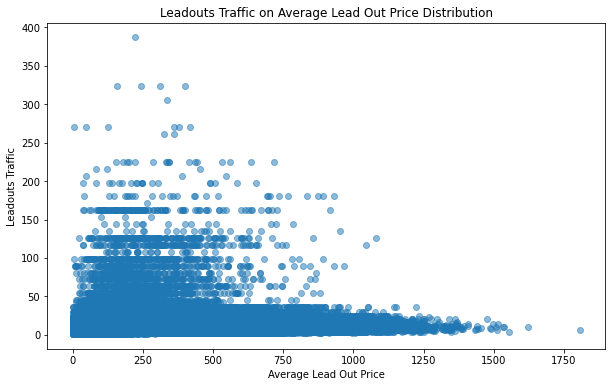

In [124]:
import matplotlib.pyplot as plt

# Plot the leadouts traffic on average_lead_out_price distribution
plt.figure(figsize=(10, 6))
plt.scatter(c_data['average_leadout_price'], c_data['leadouts'], alpha=0.5)
plt.xlabel('Average Lead Out Price')
plt.ylabel('Leadouts Traffic')
plt.title('Leadouts Traffic on Average Lead Out Price Distribution')
plt.show()

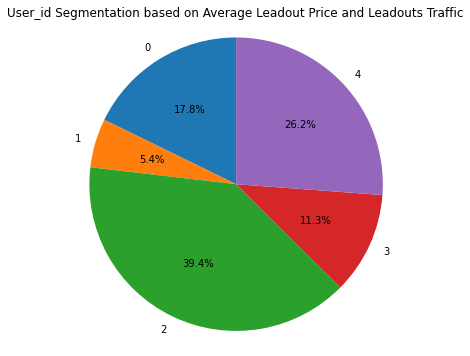

Range, Mean, and Median of 'average_leadout_price' and 'leadouts' for each segmentation:
        average_leadout_price                               leadouts         \
                          min      max        mean   median      min    max   
cluster                                                                       
0                      275.67   417.55  337.655959  333.370      1.0  324.0   
1                        0.00   158.43  102.493506  108.690      1.0  270.0   
2                      622.84  1807.37  748.945129  711.395      2.0  225.0   
3                      157.60   275.99  213.855474  212.270      1.0  387.0   
4                      417.52   622.85  497.478967  487.940      2.0  270.0   

                           
              mean median  
cluster                    
0         8.993514    7.0  
1         7.447180    6.0  
2        11.181548   10.0  
3         8.590101    7.0  
4         9.804310    8.0  


In [202]:
#Segmentation Average_leadout_price based on leadouts traffic

import pandas as pd
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans

# Prepare the data
features = c_data[['user_id', 'average_leadout_price', 'leadouts']]

# Apply k-means clustering
k = 5  # Specify the desired number of clusters
kmeans = KMeans(n_clusters=k, random_state=0)
cluster_labels = kmeans.fit_predict(features[['average_leadout_price', 'leadouts']])

# Assign cluster labels to 'user_id'
c_data['cluster'] = cluster_labels

# Calculate the average 'average_leadout_price' for each cluster
cluster_avg_leadout_price = c_data.groupby('cluster')['average_leadout_price'].mean()


# Plot the segmentation on a pie chart
plt.figure(figsize=(8, 6))
plt.pie(cluster_avg_leadout_price, labels=cluster_avg_leadout_price.index, autopct='%1.1f%%', startangle=90)
plt.title('User_id Segmentation based on Average Leadout Price and Leadouts Traffic')
plt.axis('equal')  # Ensure the pie is drawn as a circle

plt.show()

# Calculate the range, mean, and median of 'average_leadout_price' and 'leadouts' for each cluster
cluster_ranges = c_data.groupby('cluster')[['average_leadout_price', 'leadouts']].agg([ 'min','max','mean', 'median'])

# Display the range, mean, and median of 'average_leadout_price' and 'leadouts' for each segmentation
print("Range, Mean, and Median of 'average_leadout_price' and 'leadouts' for each segmentation:")
print(cluster_ranges)


In [197]:
cluster_ranges


average_leadout_price                               leadouts         \
                          min      max        mean   median      min    max   
cluster                                                                       
0                      275.67   417.55  337.655959  333.370      1.0  324.0   
1                        0.00   158.43  102.493506  108.690      1.0  270.0   
2                      622.84  1807.37  748.945129  711.395      2.0  225.0   
3                      157.60   275.99  213.855474  212.270      1.0  387.0   
4                      417.52   622.85  497.478967  487.940      2.0  270.0   

                           
              mean median  
cluster                    
0         8.993514    7.0  
1         7.447180    6.0  
2        11.181548   10.0  
3         8.590101    7.0  
4         9.804310    8.0

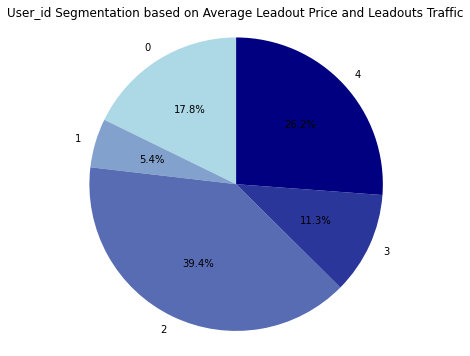

Range, Mean, and Median of 'average_leadout_price' and 'leadouts' for each segmentation:
        average_leadout_price                               leadouts         \
                          min      max        mean   median      min    max   
cluster                                                                       
0                      275.67   417.55  337.655959  333.370      1.0  324.0   
1                        0.00   158.43  102.493506  108.690      1.0  270.0   
2                      622.84  1807.37  748.945129  711.395      2.0  225.0   
3                      157.60   275.99  213.855474  212.270      1.0  387.0   
4                      417.52   622.85  497.478967  487.940      2.0  270.0   

                           
              mean median  
cluster                    
0         8.993514    7.0  
1         7.447180    6.0  
2        11.181548   10.0  
3         8.590101    7.0  
4         9.804310    8.0  


In [204]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
import matplotlib.colors as colors

# Prepare the data
features = c_data[['user_id', 'average_leadout_price', 'leadouts']]

# Apply k-means clustering
k = 5  # Specify the desired number of clusters
kmeans = KMeans(n_clusters=k, random_state=0)
cluster_labels = kmeans.fit_predict(features[['average_leadout_price', 'leadouts']])

# Assign cluster labels to 'user_id'
c_data['cluster'] = cluster_labels

# Calculate the average 'average_leadout_price' for each cluster
cluster_avg_leadout_price = c_data.groupby('cluster')['average_leadout_price'].mean()

# Create a color map with shades of blue
cmap = colors.LinearSegmentedColormap.from_list('custom_blue', ['#ADD8E6', '#000080'], N=k)

# Plot the segmentation on a pie chart
plt.figure(figsize=(8, 6))
plt.pie(cluster_avg_leadout_price, labels=cluster_avg_leadout_price.index, autopct='%1.1f%%', startangle=90, colors=cmap(range(k)))
plt.title('User_id Segmentation based on Average Leadout Price and Leadouts Traffic')
plt.axis('equal')  # Ensure the pie is drawn as a circle

plt.show()

# Calculate the range, mean, and median of 'average_leadout_price' and 'leadouts' for each cluster
cluster_ranges = c_data.groupby('cluster')[['average_leadout_price', 'leadouts']].agg(['min', 'max', 'mean', 'median'])

# Display the range, mean, and median of 'average_leadout_price' and 'leadouts' for each segmentation
print("Range, Mean, and Median of 'average_leadout_price' and 'leadouts' for each segmentation:")
print(cluster_ranges)



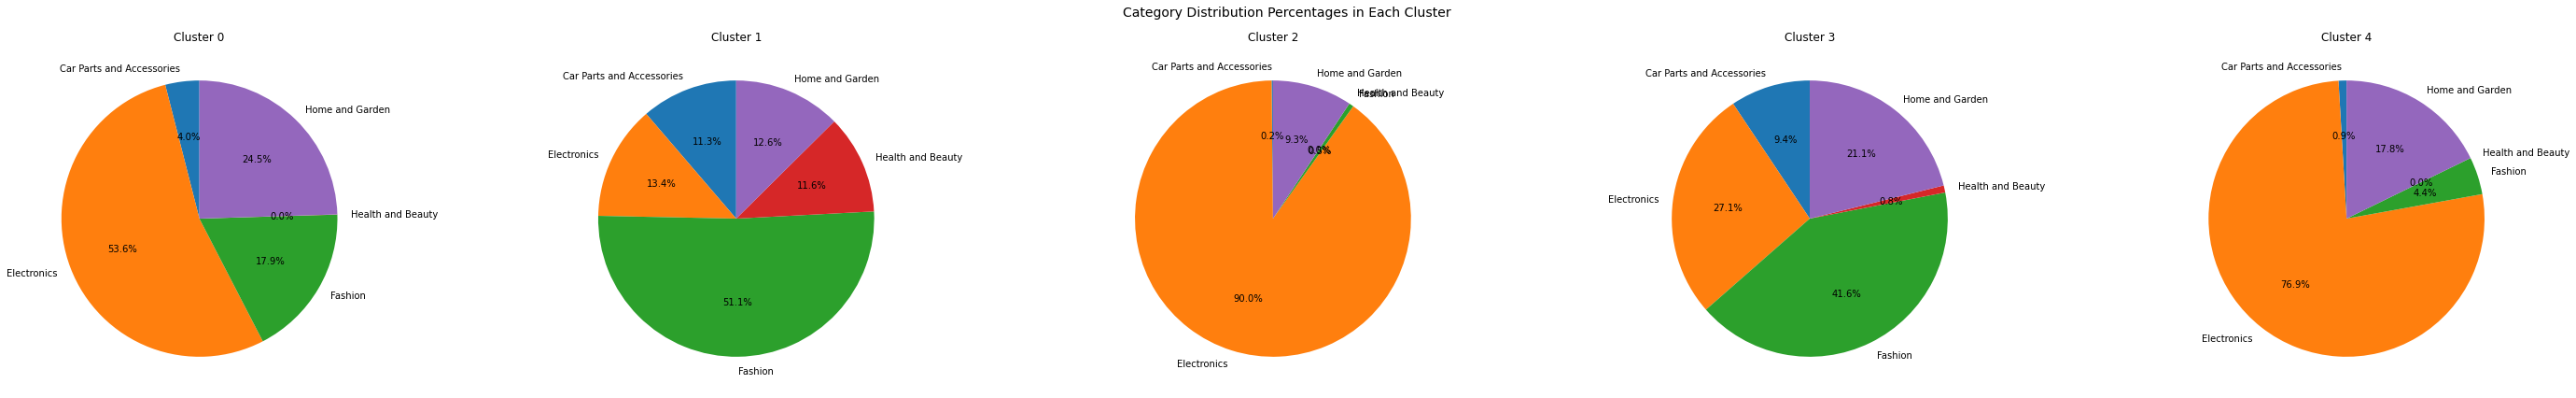

In [190]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from sklearn.cluster import KMeans

# Calculate the count of each category within each cluster
category_counts = c_data.groupby(['cluster', 'category']).size().unstack().fillna(0)

# Calculate the category distribution percentages for each cluster
category_percentages = category_counts.div(category_counts.sum(axis=1), axis=0)

# Determine the number of clusters
k = len(category_percentages)

# Calculate the number of rows and columns for subplots
num_rows = 1
num_cols = min(k, 5)

# Adjust the figure size based on the number of subplots
fig_width = num_cols * 8  # Increase the figure width
fig_height = 6

# Plot the category distribution percentages on a pie chart for each cluster
fig, axs = plt.subplots(num_rows, num_cols, figsize=(fig_width, fig_height))
axs = axs.flatten()

for cluster, ax in zip(range(k), axs):
    ax.pie(category_percentages.loc[cluster], labels=category_percentages.columns, autopct='%1.1f%%', startangle=90)
    ax.set_title(f'Cluster {cluster}')

fig.suptitle('Category Distribution Percentages in Each Cluster', fontsize=14)
plt.tight_layout()
plt.show()


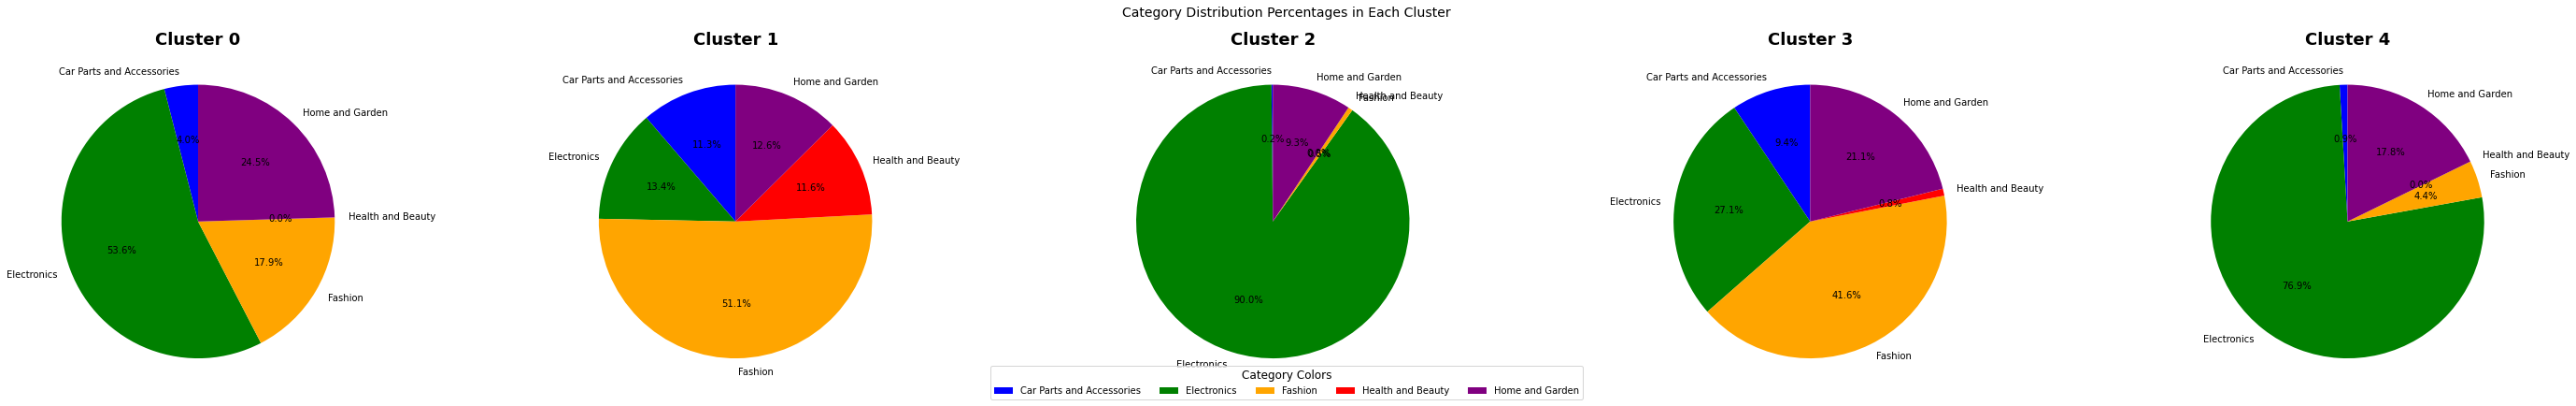

In [209]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from sklearn.cluster import KMeans

# Calculate the count of each category within each cluster
category_counts = c_data.groupby(['cluster', 'category']).size().unstack().fillna(0)

# Calculate the category distribution percentages for each cluster
category_percentages = category_counts.div(category_counts.sum(axis=1), axis=0)

# Determine the number of clusters
k = len(category_percentages)

# Calculate the number of rows and columns for subplots
num_rows = 1
num_cols = min(k, 5)

# Adjust the figure size based on the number of subplots
fig_width = num_cols * 8  # Increase the figure width
fig_height = 6

# Define category colors
category_colors = ['blue', 'green', 'orange', 'red', 'purple']

# Plot the category distribution percentages on a pie chart for each cluster
fig, axs = plt.subplots(num_rows, num_cols, figsize=(fig_width, fig_height))
axs = axs.flatten()

for cluster, ax in zip(range(k), axs):
    wedges, texts, autotexts = ax.pie(category_percentages.loc[cluster], labels=category_percentages.columns,
                                      autopct='%1.1f%%', startangle=90, colors=category_colors)
    ax.set_title(f'Cluster {cluster}', fontweight='bold', fontsize=18)

# Add legend for category colors
legend_labels = category_percentages.columns
legend_colors = category_colors[:len(legend_labels)]
fig.legend(wedges, legend_labels, loc='center', bbox_to_anchor=(0.5, 0.05), ncol=len(legend_labels),
           title='Category Colors', title_fontsize=12)

fig.suptitle('Category Distribution Percentages in Each Cluster', fontsize=14)
plt.tight_layout()
plt.show()


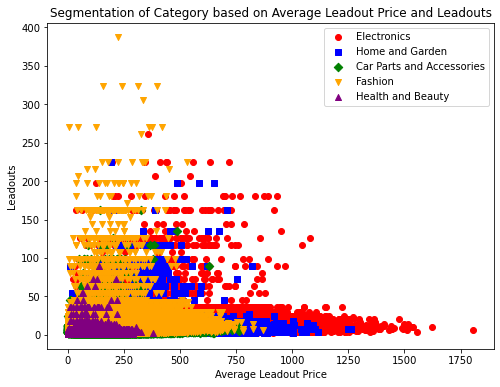

Range statistics for each category and segmentation:
                                  average_leadout_price                       \
                                                    min      max        mean   
cluster category                                                               
0       Car Parts and Accessories                275.99   417.44  324.148929   
        Electronics                              275.88   417.55  343.666121   
        Fashion                                  275.92   417.51  324.020813   
        Health and Beauty                        276.00   380.89  297.509667   
        Home and Garden                          275.67   417.54  336.680487   
1       Car Parts and Accessories                  0.00   158.42  105.124738   
        Electronics                                0.00   158.41  102.984519   
        Fashion                                    0.00   158.42  105.369302   
        Health and Beauty                          0.00   158.43   

In [143]:
# Segmentation of Categories based on Average Leadout Price and Leadouts

import pandas as pd
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans

# Prepare the data
features = c_data[['user_id', 'average_leadout_price', 'leadouts', 'category']]

# Apply k-means clustering
k = 5  # Specify the desired number of clusters
kmeans = KMeans(n_clusters=k, random_state=0)
cluster_labels = kmeans.fit_predict(features[['average_leadout_price', 'leadouts']])

# Assign cluster labels to 'user_id'
c_data['cluster'] = cluster_labels

# Plot the segmentation on a scatter plot
plt.figure(figsize=(8, 6))
colors = ['red', 'blue', 'green', 'orange', 'purple']  # Specify colors for each category
markers = ['o', 's', 'D', 'v', '^']  # Specify markers for each category

for category, color, marker in zip(c_data['category'].unique(), colors, markers):
    category_data = c_data[c_data['category'] == category]
    plt.scatter(
        category_data['average_leadout_price'], category_data['leadouts'],
        c=color, marker=marker, label=category
    )

plt.xlabel('Average Leadout Price')
plt.ylabel('Leadouts')
plt.title('Segmentation of Category based on Average Leadout Price and Leadouts')
plt.legend()
plt.show()

# Calculate the range statistics for each category and segmentation
range_stats = c_data.groupby(['cluster', 'category'])[['average_leadout_price', 'leadouts']].agg(['min', 'max', 'mean', 'median'])
print("Range statistics for each category and segmentation:")
print(range_stats)


In [140]:
# Sort the range statistics by mean leadouts
import pandas as pd

range_stats_sorted = range_stats.sort_values(('leadouts', 'mean'), ascending=False)  
range_stats_sorted_table = range_stats_sorted.reset_index()  # Reset the index to convert the grouped columns into regular columns
range_stats_sorted_table.columns = ['Cluster', 'Category', 'Min Price', 'Max Price', 'Mean Price', 'Median Price', 'Min Leadouts', 'Max Leadouts', 'Mean Leadouts', 'Median Leadouts']  # Rename the columns for better readability

# Convert to DataFrame
range_stats_df = pd.DataFrame(range_stats_sorted_table)

# Print the sorted data table
print("Range statistics for each category and segmentation (sorted by mean leadouts):")
print(range_stats_df)


Range statistics for each category and segmentation (sorted by mean leadouts):
    Cluster                   Category  Min Price  Max Price  Mean Price  \
0         4                    Fashion     417.60     622.71  470.543240   
1         0                    Fashion     275.92     417.51  324.020813   
2         2                    Fashion     623.00     868.56  669.560450   
3         2                Electronics     622.88    1807.37  753.193270   
4         3                    Fashion     157.60     275.98  208.241714   
5         4                Electronics     417.52     622.85  501.420362   
6         2  Car Parts and Accessories     623.00     762.19  666.113939   
7         1                    Fashion       0.00     158.42  105.369302   
8         2            Home and Garden     622.84    1262.28  714.037920   
9         0                Electronics     275.88     417.55  343.666121   
10        4  Car Parts and Accessories     417.62     617.73  472.781851   
11       

In [142]:
range_stats_df


,Cluster,Category,Min Price,Max Price,Mean Price,Median Price,Min Leadouts,Max Leadouts,Mean Leadouts,Median Leadouts
0,4,Fashion,417.60,622.71,470.543240,457.765,2.0,270.0,14.262548,12.0
1,0,Fashion,275.92,417.51,324.020813,315.600,2.0,324.0,12.566584,11.0
2,2,Fashion,623.00,868.56,669.560450,654.440,3.0,30.0,12.126126,11.0
3,2,Electronics,622.88,1807.37,753.193270,715.230,2.0,225.0,11.406483,10.0
4,3,Fashion,157.60,275.98,208.241714,204.340,2.0,387.0,10.852086,10.0
5,4,Electronics,417.52,622.85,501.420362,493.380,2.0,225.0,10.019212,9.0
6,2,Car Parts and Accessories,623.00,762.19,666.113939,646.220,2.0,90.0,9.939394,6.0
7,1,Fashion,0.00,158.42,105.369302,111.640,2.0,270.0,9.167452,8.0
8,2,Home and Garden,622.84,1262.28,714.037920,687.780,2.0,198.0,8.981230,8.0
9,0,Electronics,275.88,417.55,343.666121,342.000,2.0,261.0,8.847155,7.0


In [148]:
# Variable pricing in cost per click according to clustering
# add Median Volatility Price(MVP) as median price*median leadouts results

import pandas as pd

range_stats_sorted = range_stats.sort_values(('leadouts', 'mean'), ascending=False)  # Sort the range statistics by mean leadouts
range_stats_sorted_table = range_stats_sorted.reset_index()  # Reset the index to convert the grouped columns into regular columns
range_stats_sorted_table.columns = ['Cluster', 'Category', 'Min Price', 'Max Price', 'Mean Price', 'Median Price', 'Min Leadouts', 'Max Leadouts', 'Mean Leadouts', 'Median Leadouts']  # Rename the columns for better readability

# Calculate the Median Volatility Price
range_stats_sorted_table['Median Volatility Price(MVP)'] = range_stats_sorted_table['Median Price'] * range_stats_sorted_table['Median Leadouts']

# Convert to DataFrame
range_stats_df = pd.DataFrame(range_stats_sorted_table)

# Print the sorted data table
print("Range statistics for each category and segmentation (sorted by mean leadouts):")

range_stats_df

Range statistics for each category and segmentation (sorted by mean leadouts):


,Cluster,Category,Min Price,Max Price,Mean Price,Median Price,Min Leadouts,Max Leadouts,Mean Leadouts,Median Leadouts,Median Volatility Price(MVP)
0,4,Fashion,417.60,622.71,470.543240,457.765,2.0,270.0,14.262548,12.0,5493.1800
1,0,Fashion,275.92,417.51,324.020813,315.600,2.0,324.0,12.566584,11.0,3471.6000
2,2,Fashion,623.00,868.56,669.560450,654.440,3.0,30.0,12.126126,11.0,7198.8400
3,2,Electronics,622.88,1807.37,753.193270,715.230,2.0,225.0,11.406483,10.0,7152.3000
4,3,Fashion,157.60,275.98,208.241714,204.340,2.0,387.0,10.852086,10.0,2043.4000
5,4,Electronics,417.52,622.85,501.420362,493.380,2.0,225.0,10.019212,9.0,4440.4200
6,2,Car Parts and Accessories,623.00,762.19,666.113939,646.220,2.0,90.0,9.939394,6.0,3877.3200
7,1,Fashion,0.00,158.42,105.369302,111.640,2.0,270.0,9.167452,8.0,893.1200
8,2,Home and Garden,622.84,1262.28,714.037920,687.780,2.0,198.0,8.981230,8.0,5502.2400
9,0,Electronics,275.88,417.55,343.666121,342.000,2.0,261.0,8.847155,7.0,2394.0000


In [150]:
#add data frame new column as Median Volatility Price Coefficient (MVPC) 
#like Median Voltility Price(MVP) / sum(Median Voltility Price(MVP))
import pandas as pd

range_stats_sorted = range_stats.sort_values(('leadouts', 'mean'), ascending=False)  # Sort the range statistics by mean leadouts
range_stats_sorted_table = range_stats_sorted.reset_index()  # Reset the index to convert the grouped columns into regular columns
range_stats_sorted_table.columns = ['Cluster', 'Category', 'Min Price', 'Max Price', 'Mean Price', 'Median Price', 'Min Leadouts', 'Max Leadouts', 'Mean Leadouts', 'Median Leadouts']  # Rename the columns for better readability

# Calculate the Median Volatility Price
range_stats_sorted_table['Median Volatility Price'] = range_stats_sorted_table['Median Price'] * range_stats_sorted_table['Median Leadouts']

# Calculate the Median Volatility Price Coefficient (MVPC)
total_mvp = range_stats_sorted_table['Median Volatility Price'].sum()
range_stats_sorted_table['Median Volatility Price Coefficient (MVPC)'] = range_stats_sorted_table['Median Volatility Price'] / total_mvp

# Convert to DataFrame
range_stats_df = pd.DataFrame(range_stats_sorted_table)

# Print the sorted data table
print("Range statistics for each category and segmentation (sorted by mean leadouts):")
range_stats_df


Range statistics for each category and segmentation (sorted by mean leadouts):


,Cluster,Category,Min Price,Max Price,Mean Price,Median Price,Min Leadouts,Max Leadouts,Mean Leadouts,Median Leadouts,Median Volatility Price,Median Volatility Price Coefficient (MVPC)
0,4,Fashion,417.60,622.71,470.543240,457.765,2.0,270.0,14.262548,12.0,5493.1800,0.089623
1,0,Fashion,275.92,417.51,324.020813,315.600,2.0,324.0,12.566584,11.0,3471.6000,0.056640
2,2,Fashion,623.00,868.56,669.560450,654.440,3.0,30.0,12.126126,11.0,7198.8400,0.117451
3,2,Electronics,622.88,1807.37,753.193270,715.230,2.0,225.0,11.406483,10.0,7152.3000,0.116692
4,3,Fashion,157.60,275.98,208.241714,204.340,2.0,387.0,10.852086,10.0,2043.4000,0.033339
5,4,Electronics,417.52,622.85,501.420362,493.380,2.0,225.0,10.019212,9.0,4440.4200,0.072447
6,2,Car Parts and Accessories,623.00,762.19,666.113939,646.220,2.0,90.0,9.939394,6.0,3877.3200,0.063260
7,1,Fashion,0.00,158.42,105.369302,111.640,2.0,270.0,9.167452,8.0,893.1200,0.014572
8,2,Home and Garden,622.84,1262.28,714.037920,687.780,2.0,198.0,8.981230,8.0,5502.2400,0.089771
9,0,Electronics,275.88,417.55,343.666121,342.000,2.0,261.0,8.847155,7.0,2394.0000,0.039059


In [154]:
import pandas as pd

range_stats_sorted = range_stats.sort_values(('leadouts', 'mean'), ascending=False)  # Sort the range statistics by mean leadouts
range_stats_sorted_table = range_stats_sorted.reset_index()  # Reset the index to convert the grouped columns into regular columns
range_stats_sorted_table.columns = ['Cluster', 'Category', 'Min Price', 'Max Price', 'Mean Price', 'Median Price', 'Min Leadouts', 'Max Leadouts', 'Mean Leadouts', 'Median Leadouts']  # Rename the columns for better readability

# Calculate the Median Volatility Price
range_stats_sorted_table['Median Volatility Price'] = range_stats_sorted_table['Median Price'] * range_stats_sorted_table['Median Leadouts']

# Calculate the Median Volatility Price Coefficient (MVPC)
total_mvp = range_stats_sorted_table['Median Volatility Price'].sum()
range_stats_sorted_table['Median Volatility Price Coefficient (MVPC)'] = range_stats_sorted_table['Median Volatility Price'] / total_mvp

# Calculate the Cost Per Click (CPC)
range_stats_sorted_table['Cost Per Click (CPC) with MVPC'] = range_stats_sorted_table['Median Volatility Price Coefficient (MVPC)'] * range_stats_sorted_table['Median Price']/100

# Convert to DataFrame
range_stats_df = pd.DataFrame(range_stats_sorted_table)

# Print the sorted data table
print("Range statistics for each category and segmentation (sorted by mean leadouts):")
range_stats_df

Range statistics for each category and segmentation (sorted by mean leadouts):


,Cluster,Category,Min Price,Max Price,Mean Price,Median Price,Min Leadouts,Max Leadouts,Mean Leadouts,Median Leadouts,Median Volatility Price,Median Volatility Price Coefficient (MVPC),Cost Per Click (CPC) with MVPC
0,4,Fashion,417.60,622.71,470.543240,457.765,2.0,270.0,14.262548,12.0,5493.1800,0.089623,0.410262
1,0,Fashion,275.92,417.51,324.020813,315.600,2.0,324.0,12.566584,11.0,3471.6000,0.056640,0.178756
2,2,Fashion,623.00,868.56,669.560450,654.440,3.0,30.0,12.126126,11.0,7198.8400,0.117451,0.768647
3,2,Electronics,622.88,1807.37,753.193270,715.230,2.0,225.0,11.406483,10.0,7152.3000,0.116692,0.834615
4,3,Fashion,157.60,275.98,208.241714,204.340,2.0,387.0,10.852086,10.0,2043.4000,0.033339,0.068124
5,4,Electronics,417.52,622.85,501.420362,493.380,2.0,225.0,10.019212,9.0,4440.4200,0.072447,0.357438
6,2,Car Parts and Accessories,623.00,762.19,666.113939,646.220,2.0,90.0,9.939394,6.0,3877.3200,0.063260,0.408796
7,1,Fashion,0.00,158.42,105.369302,111.640,2.0,270.0,9.167452,8.0,893.1200,0.014572,0.016268
8,2,Home and Garden,622.84,1262.28,714.037920,687.780,2.0,198.0,8.981230,8.0,5502.2400,0.089771,0.617424
9,0,Electronics,275.88,417.55,343.666121,342.000,2.0,261.0,8.847155,7.0,2394.0000,0.039059,0.133581


In [161]:
#add to data frame new column as Cost Per Click As Fixed Price like 0.1

import pandas as pd

range_stats_sorted = range_stats.sort_values(('leadouts', 'mean'), ascending=False)  # Sort the range statistics by mean leadouts
range_stats_sorted_table = range_stats_sorted.reset_index()  # Reset the index to convert the grouped columns into regular columns
range_stats_sorted_table.columns = ['Cluster', 'Category', 'Min Price', 'Max Price', 'Mean Price', 'Median Price', 'Min Leadouts', 'Max Leadouts', 'Mean Leadouts', 'Median Leadouts']  # Rename the columns for better readability

# Calculate the Median Volatility Price
range_stats_sorted_table['Median Volatility Price'] = range_stats_sorted_table['Median Price'] * range_stats_sorted_table['Median Leadouts']

# Calculate the Median Volatility Price Coefficient (MVPC)
total_mvp = range_stats_sorted_table['Median Volatility Price'].sum()
range_stats_sorted_table['Median Volatility Price Coefficient (MVPC)'] = range_stats_sorted_table['Median Volatility Price'] / total_mvp

# Calculate the Cost Per Click (CPC)
range_stats_sorted_table['Cost Per Click (CPC) with MVPC'] = range_stats_sorted_table['Median Volatility Price Coefficient (MVPC)'] * range_stats_sorted_table['Median Price']/100

# Calculate the Cost Per Click (CPC) As Fixed Price
range_stats_sorted_table['Cost Per Click (CPC) As Fixed Price'] = 0.1

# Convert to DataFrame
range_stats_df = pd.DataFrame(range_stats_sorted_table)

# Print the sorted data table
print("Range statistics for each category and segmentation (sorted by mean leadouts):")
range_stats_df


Range statistics for each category and segmentation (sorted by mean leadouts):


,Cluster,Category,Min Price,Max Price,Mean Price,Median Price,Min Leadouts,Max Leadouts,Mean Leadouts,Median Leadouts,Median Volatility Price,Median Volatility Price Coefficient (MVPC),Cost Per Click (CPC) with MVPC,Cost Per Click (CPC) As Fixed Price
0,4,Fashion,417.60,622.71,470.543240,457.765,2.0,270.0,14.262548,12.0,5493.1800,0.089623,0.410262,0.1
1,0,Fashion,275.92,417.51,324.020813,315.600,2.0,324.0,12.566584,11.0,3471.6000,0.056640,0.178756,0.1
2,2,Fashion,623.00,868.56,669.560450,654.440,3.0,30.0,12.126126,11.0,7198.8400,0.117451,0.768647,0.1
3,2,Electronics,622.88,1807.37,753.193270,715.230,2.0,225.0,11.406483,10.0,7152.3000,0.116692,0.834615,0.1
4,3,Fashion,157.60,275.98,208.241714,204.340,2.0,387.0,10.852086,10.0,2043.4000,0.033339,0.068124,0.1
5,4,Electronics,417.52,622.85,501.420362,493.380,2.0,225.0,10.019212,9.0,4440.4200,0.072447,0.357438,0.1
6,2,Car Parts and Accessories,623.00,762.19,666.113939,646.220,2.0,90.0,9.939394,6.0,3877.3200,0.063260,0.408796,0.1
7,1,Fashion,0.00,158.42,105.369302,111.640,2.0,270.0,9.167452,8.0,893.1200,0.014572,0.016268,0.1
8,2,Home and Garden,622.84,1262.28,714.037920,687.780,2.0,198.0,8.981230,8.0,5502.2400,0.089771,0.617424,0.1
9,0,Electronics,275.88,417.55,343.666121,342.000,2.0,261.0,8.847155,7.0,2394.0000,0.039059,0.133581,0.1


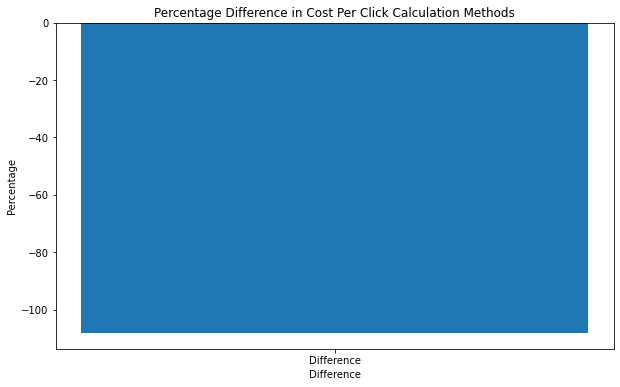

In [167]:
import matplotlib.pyplot as plt

# Calculate the percentage differences
cpc_diff_percentage = (range_stats_df['Cost Per Click (CPC) As Fixed Price'] - range_stats_df['Cost Per Click (CPC) with MVPC']).sum() / range_stats_df['Cost Per Click (CPC) As Fixed Price'].sum() * 100

# Create a bar plot
plt.figure(figsize=(10, 6))
plt.bar(['Difference'], [cpc_diff_percentage])
plt.xlabel('Difference')
plt.ylabel('Percentage')
plt.title('Percentage Difference in Cost Per Click Calculation Methods')

# Display the plot
plt.show()
